In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df= pd.read_csv("C:\WORK\Projects\Stock prediction\prices.csv")

In [4]:
df.head()

,date,symbol,open,close,low,high,volume
0,2016-01-05 00:00:00,WLTW,123.430000,125.839996,122.309998,126.250000,2163600.0
1,2016-01-06 00:00:00,WLTW,125.239998,119.980003,119.940002,125.540001,2386400.0
2,2016-01-07 00:00:00,WLTW,116.379997,114.949997,114.930000,119.739998,2489500.0
3,2016-01-08 00:00:00,WLTW,115.480003,116.620003,113.500000,117.440002,2006300.0
4,2016-01-11 00:00:00,WLTW,117.010002,114.970001,114.089996,117.330002,1408600.0


In [5]:
df.isnull()

,date,symbol,open,close,low,high,volume
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
851259,False,False,False,False,False,False,False
851260,False,False,False,False,False,False,False
851261,False,False,False,False,False,False,False
851262,False,False,False,False,False,False,False


In [7]:
df.shape

(851264, 7)

In [8]:
df.describe()

,open,close,low,high,volume
count,851264.000000,851264.000000,851264.000000,851264.000000,8.512640e+05
mean,70.836986,70.857109,70.118414,71.543476,5.415113e+06
std,83.695876,83.689686,82.877294,84.465504,1.249468e+07
min,0.850000,0.860000,0.830000,0.880000,0.000000e+00
25%,33.840000,33.849998,33.480000,34.189999,1.221500e+06
50%,52.770000,52.799999,52.230000,53.310001,2.476250e+06
75%,79.879997,79.889999,79.110001,80.610001,5.222500e+06
max,1584.439941,1578.130005,1549.939941,1600.930054,8.596434e+08


In [12]:
df1=df[df['symbol']=='GOOG']

In [15]:
df1.describe()

,open,close,low,high,volume
count,1762.000000,1762.000000,1762.000000,1762.000000,1.762000e+03
mean,667.988556,667.732200,662.013391,673.341401,4.051179e+06
std,159.812252,159.790218,159.052972,160.469786,2.933261e+06
min,438.310758,436.070761,433.630737,442.280760,7.900000e+03
25%,548.639605,547.364993,542.753834,553.582514,1.901175e+06
50%,613.846067,614.161057,609.356057,619.111038,3.642400e+06
75%,749.962820,749.452515,742.882817,756.218456,5.165425e+06
max,1226.802152,1220.172036,1218.602083,1228.882066,2.976060e+07


In [16]:
df1.shape

(1762, 7)

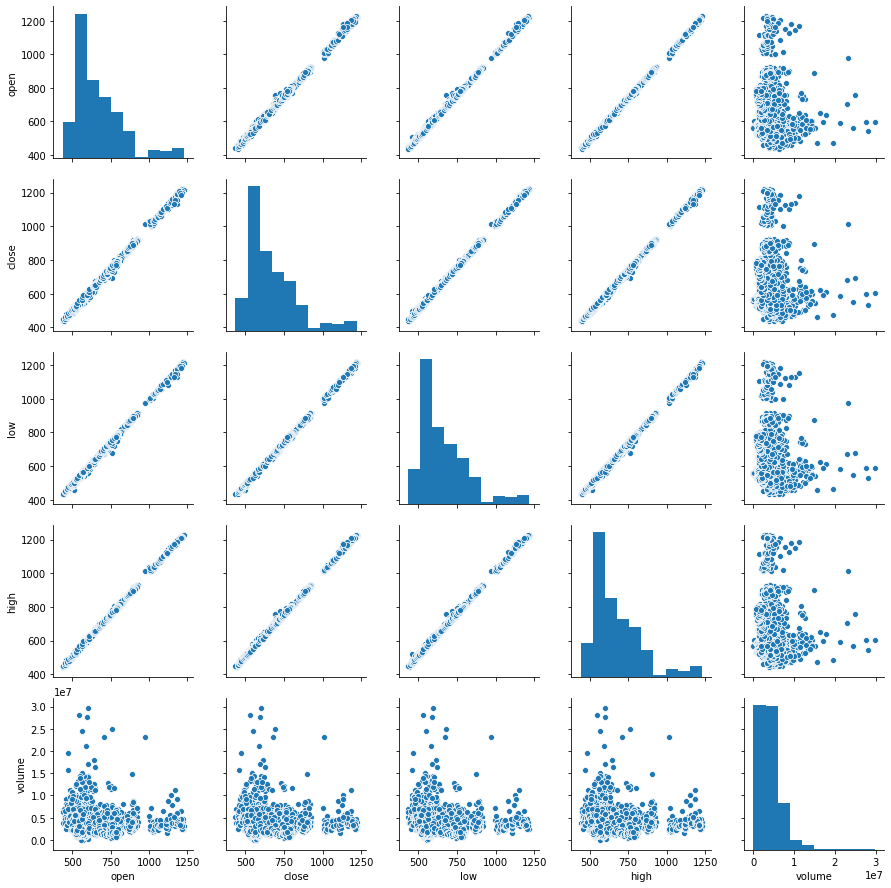

In [22]:
sns.pairplot(df1)

Text(0.5, 1.0, 'Stock value change')

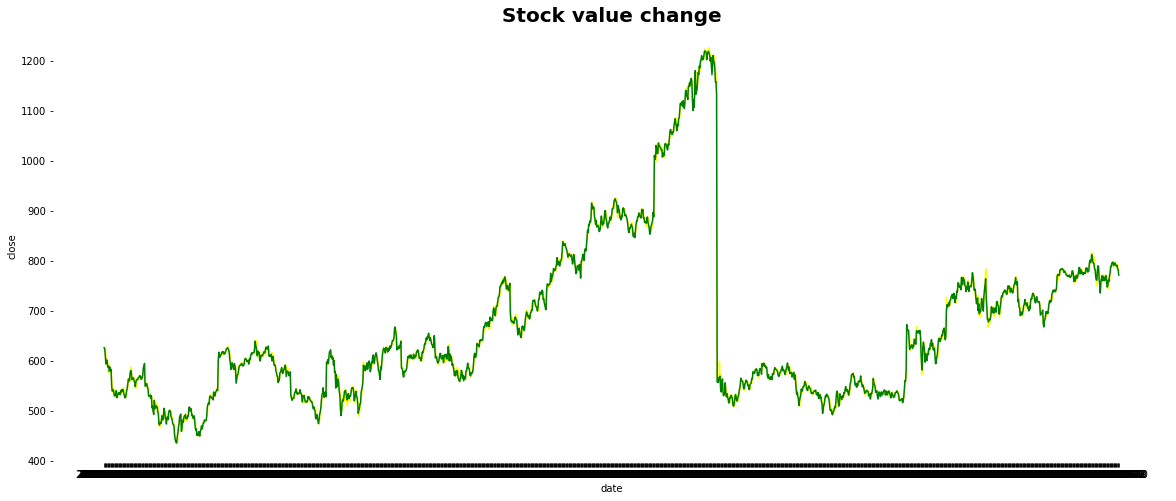

In [82]:
fig=plt.figure(figsize=(20,8))
ax=sns.lineplot(data=df1, x='date',y='open',color='yellow')
ax=sns.lineplot(data=df1, x='date',y='close', color='green')
for s in ['left','right','top','bottom']:
    ax.spines[s].set_visible(False)

plt.title("Stock value change", size=20, weight='bold')

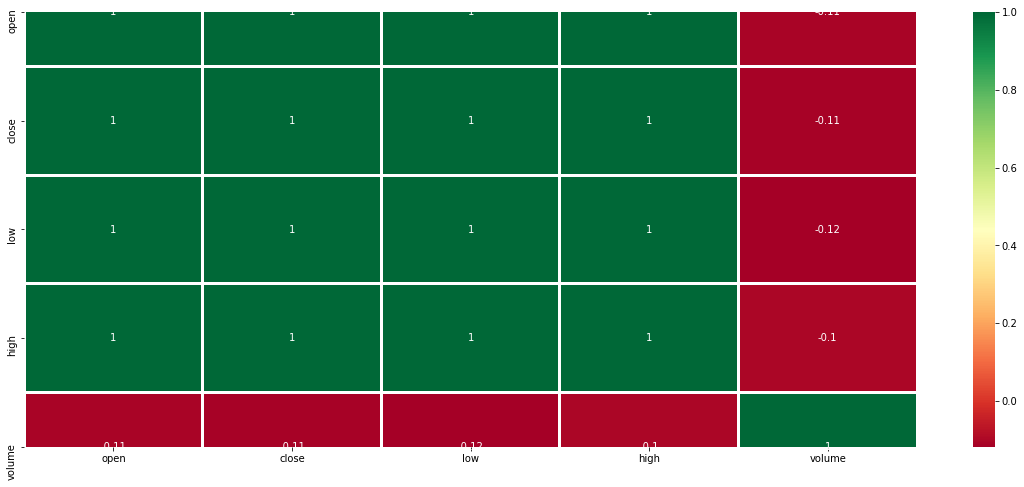

In [36]:
#closing price of stock is target variable
fig1=plt.figure(figsize=(20,8))
sns.heatmap(df1.corr(), annot=True, cmap='RdYlGn', linecolor='white', linewidth=2 )

In [37]:
x=df1[['volume','open','low','high']]
y=df1['close']
from sklearn.ensemble import ExtraTreesRegressor
model = ExtraTreesRegressor()
model.fit(x,y)

C:\WORK\software\anaconda\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


ExtraTreesRegressor(bootstrap=False, criterion='mse', max_depth=None,
                    max_features='auto', max_leaf_nodes=None,
                    min_impurity_decrease=0.0, min_impurity_split=None,
                    min_samples_leaf=1, min_samples_split=2,
                    min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
                    oob_score=False, random_state=None, verbose=0,
                    warm_start=False)

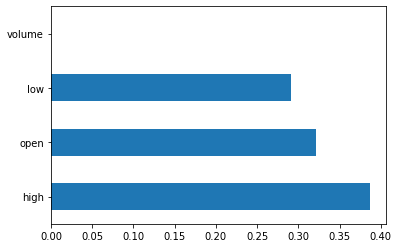

In [45]:
feat_importance = pd.Series(model.feature_importances_, index=x.columns)
feat_importance.nlargest(5).plot(kind='barh')
plt.show()

In [43]:
X=df1[['volume','open']]
Y=df1['close']

In [44]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.3, shuffle=False, random_state=0)

In [46]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test =scaler.transform(X_test)

In [55]:
from sklearn import linear_model
from sklearn.metundersotodurics import r2_score, mean_squared_error, mean_absolute_error
lm = linear_model.LinearRegression()
lm.fit(X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [56]:
lm.score(X_train,Y_train)

0.9982165027471543

In [57]:
pred=lm.predict(X_test)

In [80]:
sc=lm.score(X_test, Y_test)
print("Accuracy score",sc)

Accuracy score 0.9937881705715189


In [77]:
r2=np.round(r2_score(Y_test,pred),2)
mse=np.round(mean_squared_error(Y_test,pred),2)

In [78]:
print("R2 score",r2)

R2 score 0.99


In [79]:
print("Mean squared error",mse)

Mean squared error 58.46


Text(800000, 560, 'Mean Squared error : 58.46')

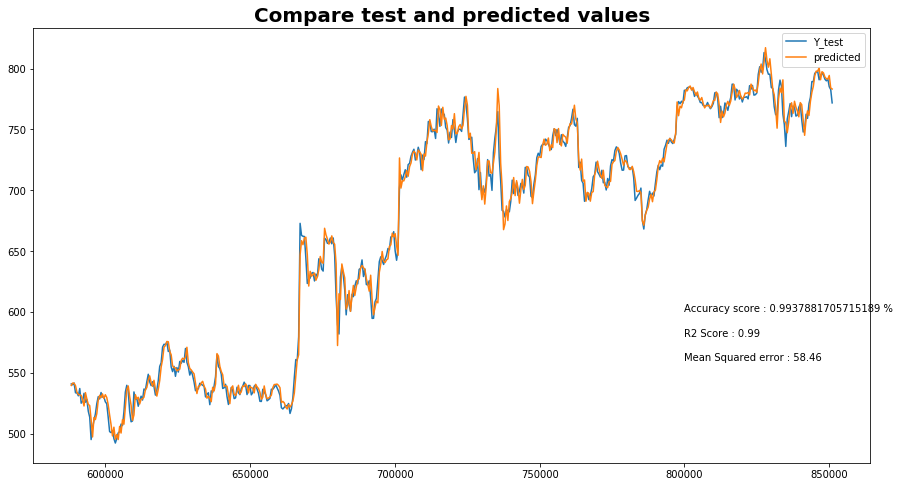

In [84]:
fig=plt.figure(figsize=(15,8))
p=pd.Series(pred, index=Y_test.index)
plt.plot(Y_test)
plt.plot(p)
plt.legend(['Y_test','predicted'])
plt.title("Compare test and predicted values", size=20, weight='bold')
plt.text(x=800000, y=600,s='Accuracy score : {} %'.format(sc))
plt.text(x=800000, y=580,s='R2 Score : {}'.format(r2))
plt.text(x=800000, y=560,s='Mean Squared error : {}'.format(mse))

In [130]:
#lasso regression Cross Validation
from sklearn.linear_model import LassoCV
from sklearn.model_selection import RepeatedKFold
from numpy import arange

In [131]:
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)

In [135]:
model = LassoCV(alphas=arange(0.1, 1, 0.01), cv=cv, n_jobs=-1)

In [139]:
model.fit(X_train,Y_train)

LassoCV(alphas=array([0.1 , 0.11, 0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 ,
       0.21, 0.22, 0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31,
       0.32, 0.33, 0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42,
       0.43, 0.44, 0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53,
       0.54, 0.55, 0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64,
       0.65, 0.66, 0.67, 0.68, 0.69, 0.7 , 0.71, 0.72, 0.73, 0.74, 0.75,
       0.76,....83, 0.84, 0.85, 0.86,
       0.87, 0.88, 0.89, 0.9 , 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97,
       0.98, 0.99]),
        copy_X=True,
        cv=<sklearn.model_selection._split.RepeatedKFold object at 0x0000019EF02A5488>,
        eps=0.001, fit_intercept=True, max_iter=1000, n_alphas=100, n_jobs=-1,
        normalize=False, positive=False, precompute='auto', random_state=None,
        selection='cyclic', tol=0.0001, verbose=False)

In [140]:
scl=model.score(X_test, Y_test)
print("Accuracy score",sc)

Accuracy score 0.9934331511723277


In [141]:
pred1=model.predict(X_test)

In [142]:
r2l=np.round(r2_score(Y_test,pred1),2)
msel=np.round(mean_squared_error(Y_test,pred1),2)

In [143]:
print("R2 score after lasso regression cross validation",r2l)

R2 score after lasso regression cross validation 0.99


In [144]:
print("Mean square error after lasso regression cross validation",msel)

Mean square error after lasso regression cross validation 58.36


Text(800000, 560, 'Mean Squared error : 58.36')

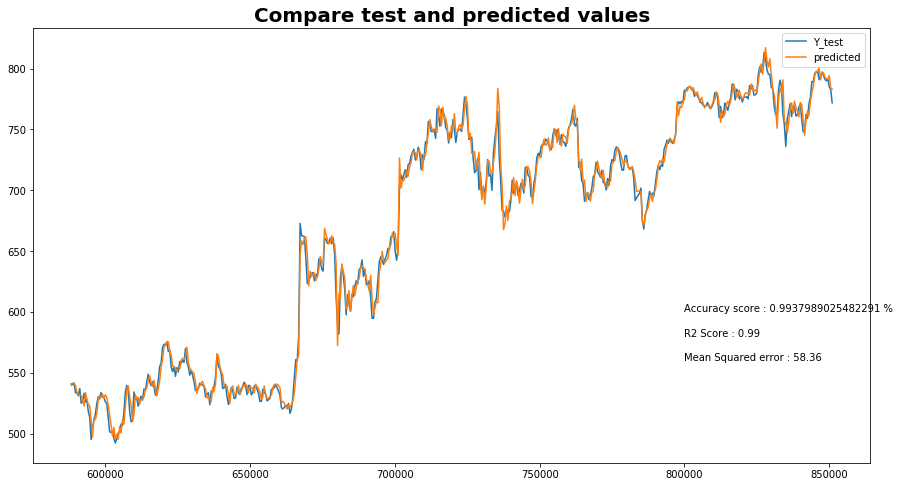

In [145]:
fig=plt.figure(figsize=(15,8))
p=pd.Series(pred, index=Y_test.index)
plt.plot(Y_test)
plt.plot(p)
plt.legend(['Y_test','predicted'])
plt.title("Compare test and predicted values", size=20, weight='bold')
plt.text(x=800000, y=600,s='Accuracy score : {} %'.format(scl))
plt.text(x=800000, y=580,s='R2 Score : {}'.format(r2l))
plt.text(x=800000, y=560,s='Mean Squared error : {}'.format(msel))